<a href="https://colab.research.google.com/github/Deanelle/NBA-Player-Impact/blob/main/Determining_Impact_that_a_Player_Has_on_the_Game_of_Basketball.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The other day, my friends and I were in a deep debate wondering how we can go about determining which players impact the game the most today. Of course names like Lebron James, Joel Embiid, Steph Curry, and Giannis Antetokounmpo came up in conversation but what about those forgotten few that are impacting their teams and are not getting the credit they so rightfully deserve. 

Therefore, for this project I've run some analysis to determine a player's impact using win shares since wins matter the most above anything in basketball. If you are not adding wins then you are not contributing much to a team's overall success. 

The Data comes from Basketball Reference from the 2021 season and I decided  to use that one to predict the top win shares for the upcoming season.
 

In [ ]:
#importing the libraries used 
import pandas as pd 
import requests 
from bs4 import BeautifulSoup 
from urllib.request import urlopen 
import re 
import datetime as dt 
import random 
from time import sleep 
import os

In [ ]:
#webscraping
year=2021

url='https://www.basketball-reference.com/leagues/NBA_2021_advanced.html'

html=urlopen(url)

soup=BeautifulSoup(html)

In [ ]:
rows = soup.findAll('tr')[1:]
player_stats = [[td.getText() for td in rows[i].findAll('td')]
            for i in range(len(rows))]

In [ ]:
soup.findAll('tr',limit=2)

headers=[th.getText()for th in soup.findAll('tr', limit=2)[0].findAll('th')]

headers=headers[1:]
headers

['Player',
 'Pos',
 'Age',
 'Tm',
 'G',
 'MP',
 'PER',
 'TS%',
 '3PAr',
 'FTr',
 'ORB%',
 'DRB%',
 'TRB%',
 'AST%',
 'STL%',
 'BLK%',
 'TOV%',
 'USG%',
 '\xa0',
 'OWS',
 'DWS',
 'WS',
 'WS/48',
 '\xa0',
 'OBPM',
 'DBPM',
 'BPM',
 'VORP']

In [ ]:
#putting the player stats table into a DataFrame
player_stats= pd.DataFrame(player_stats, columns = headers)

In [ ]:
player_stats

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,,OWS,DWS,WS,WS/48,,OBPM,DBPM,BPM,VORP
0,Precious Achiuwa,PF,21,MIA,61,737,14.2,.550,.004,.482,...,,0.3,1.0,1.3,.085,,-3.6,-0.5,-4.1,-0.4
1,Jaylen Adams,PG,24,MIL,7,18,-6.5,.125,.250,.000,...,,-0.1,0.0,-0.1,-0.252,,-15.1,-4.6,-19.8,-0.1
2,Steven Adams,C,27,NOP,58,1605,15.1,.596,.010,.438,...,,2.3,1.7,4.0,.119,,-0.4,0.1,-0.3,0.7
3,Bam Adebayo,C,23,MIA,64,2143,22.7,.626,.010,.443,...,,5.6,3.2,8.8,.197,,2.9,2.0,4.9,3.7
4,LaMarcus Aldridge,C,35,TOT,26,674,15.7,.556,.270,.159,...,,0.5,0.6,1.1,.080,,-0.2,-0.2,-0.3,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,Delon Wright,PG,28,SAC,27,696,15.9,.563,.369,.160,...,,0.8,0.5,1.3,.092,,0.5,0.6,1.2,0.6
727,Thaddeus Young,PF,32,CHI,68,1652,20.3,.578,.068,.171,...,,2.8,2.2,5.1,.147,,1.9,1.4,3.3,2.2
728,Trae Young,PG,22,ATL,63,2125,23.0,.589,.357,.491,...,,5.9,1.3,7.2,.163,,5.3,-1.7,3.7,3.0
729,Cody Zeller,C,28,CHO,48,1005,18.2,.599,.086,.367,...,,2.1,1.1,3.3,.156,,-0.2,-0.2,-0.5,0.4


In [ ]:
# export dataframe to a CSV 
player_stats.to_csv("player_stats.csv",header=True)

In [ ]:
player_stats.head(10)

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,,OWS,DWS,WS,WS/48,,OBPM,DBPM,BPM,VORP
0,Precious Achiuwa,PF,21,MIA,61,737,14.2,.550,.004,.482,...,,0.3,1.0,1.3,.085,,-3.6,-0.5,-4.1,-0.4
1,Jaylen Adams,PG,24,MIL,7,18,-6.5,.125,.250,.000,...,,-0.1,0.0,-0.1,-0.252,,-15.1,-4.6,-19.8,-0.1
2,Steven Adams,C,27,NOP,58,1605,15.1,.596,.010,.438,...,,2.3,1.7,4.0,.119,,-0.4,0.1,-0.3,0.7
3,Bam Adebayo,C,23,MIA,64,2143,22.7,.626,.010,.443,...,,5.6,3.2,8.8,.197,,2.9,2.0,4.9,3.7
4,LaMarcus Aldridge,C,35,TOT,26,674,15.7,.556,.270,.159,...,,0.5,0.6,1.1,.080,,-0.2,-0.2,-0.3,0.3
5,LaMarcus Aldridge,C,35,SAS,21,544,15.1,.545,.302,.149,...,,0.3,0.5,0.8,.067,,-0.2,-0.7,-0.9,0.2
6,LaMarcus Aldridge,C,35,BRK,5,130,18.2,.611,.104,.208,...,,0.2,0.2,0.4,.135,,0.1,2.1,2.2,0.1
7,Ty-Shon Alexander,SG,22,PHO,15,47,4.2,.349,.750,.167,...,,-0.1,0.0,0.0,-0.048,,-4.8,-1.7,-6.5,-0.1
8,Nickeil Alexander-Walker,SG,22,NOP,46,1007,12.5,.522,.478,.144,...,,-0.3,1.0,0.7,.035,,-1.4,0.1,-1.3,0.2
9,Grayson Allen,SG,25,MEM,50,1259,12.8,.586,.662,.220,...,,1.5,1.2,2.7,.101,,-0.2,0.1,-0.2,0.6


This our dataframe. I decided to look at the first ten row and for row 4,5,and 6 we have the same player listed. I am going to get rid of row 5 and 5 since row 4 tells me the total games that LaMarcus Alrigde played prior to being diagnosed with his heart condition. 

In [ ]:
player_stats.tail(10)

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,,OWS,DWS,WS,WS/48,,OBPM,DBPM,BPM,VORP
721,James Wiseman,C,19,GSW,39,836,13.1,.552,.103,.234,...,,-0.4,1.2,0.7,.042,,-4.0,-1.0,-5.0,-0.6
722,Christian Wood,C,25,HOU,41,1326,20.0,.591,.322,.309,...,,1.4,1.4,2.8,.100,,1.7,-0.3,1.4,1.1
723,Robert Woodard II,SF,21,SAC,13,45,12.5,.425,.300,.400,...,,0.0,0.0,0.0,-0.011,,-2.7,-2.6,-5.3,0.0
724,Delon Wright,SG-PG,28,TOT,63,1748,16.3,.562,.332,.243,...,,2.5,1.8,4.3,.117,,0.6,1.5,2.2,1.8
725,Delon Wright,SG,28,DET,36,1052,16.5,.562,.304,.307,...,,1.7,1.3,2.9,.134,,0.7,2.2,2.9,1.3
726,Delon Wright,PG,28,SAC,27,696,15.9,.563,.369,.160,...,,0.8,0.5,1.3,.092,,0.5,0.6,1.2,0.6
727,Thaddeus Young,PF,32,CHI,68,1652,20.3,.578,.068,.171,...,,2.8,2.2,5.1,.147,,1.9,1.4,3.3,2.2
728,Trae Young,PG,22,ATL,63,2125,23.0,.589,.357,.491,...,,5.9,1.3,7.2,.163,,5.3,-1.7,3.7,3.0
729,Cody Zeller,C,28,CHO,48,1005,18.2,.599,.086,.367,...,,2.1,1.1,3.3,.156,,-0.2,-0.2,-0.5,0.4
730,Ivica Zubac,C,23,LAC,72,1609,19.1,.693,.010,.434,...,,4.8,2.1,6.9,.206,,0.6,0.4,1.0,1.2


I also checked the last 10 columns in the data and saw the that row 724,725,and 726 had information about Delon Wright. I going to drop 725 and 726 and keep his total games played. First though, I want to check the data types. 

In [ ]:
#checking the datatypes of each column
player_stats.dtypes

Player    object
Pos       object
Age       object
Tm        object
G         object
MP        object
PER       object
TS%       object
3PAr      object
FTr       object
ORB%      object
DRB%      object
TRB%      object
AST%      object
STL%      object
BLK%      object
TOV%      object
USG%      object
          object
OWS       object
DWS       object
WS        object
WS/48     object
          object
OBPM      object
DBPM      object
BPM       object
VORP      object
dtype: object

The columns are all objects so I'm going to convert the variables that are numeric into floats

In [ ]:
cols = ['Age','G','MP','PER','TS%','3PAr','FTr','ORB%','DRB%','TRB%','AST%','STL%','BLK%','TOV%','USG%','OWS','DWS','WS','WS/48','OBPM','DBPM','BPM','VORP']
player_stats[cols] = player_stats[cols].apply(pd.to_numeric, errors='coerce', axis=1)

In [ ]:
#checking the columns once again 
player_stats.dtypes

Player     object
Pos        object
Age       float64
Tm         object
G         float64
MP        float64
PER       float64
TS%       float64
3PAr      float64
FTr       float64
ORB%      float64
DRB%      float64
TRB%      float64
AST%      float64
STL%      float64
BLK%      float64
TOV%      float64
USG%      float64
           object
OWS       float64
DWS       float64
WS        float64
WS/48     float64
           object
OBPM      float64
DBPM      float64
BPM       float64
VORP      float64
dtype: object

In [ ]:
#checking the first few columns again
player_stats.head(10)

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,,OWS,DWS,WS,WS/48,,OBPM,DBPM,BPM,VORP
0,Precious Achiuwa,PF,21.0,MIA,61.0,737.0,14.2,0.550,0.004,0.482,...,,0.3,1.0,1.3,0.085,,-3.6,-0.5,-4.1,-0.4
1,Jaylen Adams,PG,24.0,MIL,7.0,18.0,-6.5,0.125,0.250,0.000,...,,-0.1,0.0,-0.1,-0.252,,-15.1,-4.6,-19.8,-0.1
2,Steven Adams,C,27.0,NOP,58.0,1605.0,15.1,0.596,0.010,0.438,...,,2.3,1.7,4.0,0.119,,-0.4,0.1,-0.3,0.7
3,Bam Adebayo,C,23.0,MIA,64.0,2143.0,22.7,0.626,0.010,0.443,...,,5.6,3.2,8.8,0.197,,2.9,2.0,4.9,3.7
4,LaMarcus Aldridge,C,35.0,TOT,26.0,674.0,15.7,0.556,0.270,0.159,...,,0.5,0.6,1.1,0.080,,-0.2,-0.2,-0.3,0.3
5,LaMarcus Aldridge,C,35.0,SAS,21.0,544.0,15.1,0.545,0.302,0.149,...,,0.3,0.5,0.8,0.067,,-0.2,-0.7,-0.9,0.2
6,LaMarcus Aldridge,C,35.0,BRK,5.0,130.0,18.2,0.611,0.104,0.208,...,,0.2,0.2,0.4,0.135,,0.1,2.1,2.2,0.1
7,Ty-Shon Alexander,SG,22.0,PHO,15.0,47.0,4.2,0.349,0.750,0.167,...,,-0.1,0.0,0.0,-0.048,,-4.8,-1.7,-6.5,-0.1
8,Nickeil Alexander-Walker,SG,22.0,NOP,46.0,1007.0,12.5,0.522,0.478,0.144,...,,-0.3,1.0,0.7,0.035,,-1.4,0.1,-1.3,0.2
9,Grayson Allen,SG,25.0,MEM,50.0,1259.0,12.8,0.586,0.662,0.220,...,,1.5,1.2,2.7,0.101,,-0.2,0.1,-0.2,0.6


In [ ]:
#checking for null values
player_stats.isnull().sum()

Player    26
Pos       26
Age       26
Tm        26
G         26
MP        26
PER       26
TS%       28
3PAr      28
FTr       28
ORB%      26
DRB%      26
TRB%      26
AST%      26
STL%      26
BLK%      26
TOV%      27
USG%      26
          26
OWS       26
DWS       26
WS        26
WS/48     26
          26
OBPM      26
DBPM      26
BPM       26
VORP      26
dtype: int64

In [ ]:
#filling the columns with 0
player_stats = player_stats[:].fillna(0)

In [ ]:
#checking the null columns again 
player_stats.isnull().sum()

Player    0
Pos       0
Age       0
Tm        0
G         0
MP        0
PER       0
TS%       0
3PAr      0
FTr       0
ORB%      0
DRB%      0
TRB%      0
AST%      0
STL%      0
BLK%      0
TOV%      0
USG%      0
          0
OWS       0
DWS       0
WS        0
WS/48     0
          0
OBPM      0
DBPM      0
BPM       0
VORP      0
dtype: int64

In [ ]:
nan_values = player_stats.isna().any()
print(nan_values)

Player    False
Pos       False
Age       False
Tm        False
G         False
MP        False
PER       False
TS%       False
3PAr      False
FTr       False
ORB%      False
DRB%      False
TRB%      False
AST%      False
STL%      False
BLK%      False
TOV%      False
USG%      False
          False
OWS       False
DWS       False
WS        False
WS/48     False
          False
OBPM      False
DBPM      False
BPM       False
VORP      False
dtype: bool


In [ ]:
player_stats.head(10)

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,,OWS,DWS,WS,WS/48,,OBPM,DBPM,BPM,VORP
0,Precious Achiuwa,PF,21.0,MIA,61.0,737.0,14.2,0.550,0.004,0.482,...,,0.3,1.0,1.3,0.085,,-3.6,-0.5,-4.1,-0.4
1,Jaylen Adams,PG,24.0,MIL,7.0,18.0,-6.5,0.125,0.250,0.000,...,,-0.1,0.0,-0.1,-0.252,,-15.1,-4.6,-19.8,-0.1
2,Steven Adams,C,27.0,NOP,58.0,1605.0,15.1,0.596,0.010,0.438,...,,2.3,1.7,4.0,0.119,,-0.4,0.1,-0.3,0.7
3,Bam Adebayo,C,23.0,MIA,64.0,2143.0,22.7,0.626,0.010,0.443,...,,5.6,3.2,8.8,0.197,,2.9,2.0,4.9,3.7
4,LaMarcus Aldridge,C,35.0,TOT,26.0,674.0,15.7,0.556,0.270,0.159,...,,0.5,0.6,1.1,0.080,,-0.2,-0.2,-0.3,0.3
5,LaMarcus Aldridge,C,35.0,SAS,21.0,544.0,15.1,0.545,0.302,0.149,...,,0.3,0.5,0.8,0.067,,-0.2,-0.7,-0.9,0.2
6,LaMarcus Aldridge,C,35.0,BRK,5.0,130.0,18.2,0.611,0.104,0.208,...,,0.2,0.2,0.4,0.135,,0.1,2.1,2.2,0.1
7,Ty-Shon Alexander,SG,22.0,PHO,15.0,47.0,4.2,0.349,0.750,0.167,...,,-0.1,0.0,0.0,-0.048,,-4.8,-1.7,-6.5,-0.1
8,Nickeil Alexander-Walker,SG,22.0,NOP,46.0,1007.0,12.5,0.522,0.478,0.144,...,,-0.3,1.0,0.7,0.035,,-1.4,0.1,-1.3,0.2
9,Grayson Allen,SG,25.0,MEM,50.0,1259.0,12.8,0.586,0.662,0.220,...,,1.5,1.2,2.7,0.101,,-0.2,0.1,-0.2,0.6


In [ ]:
player_stats.tail(10)

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,,OWS,DWS,WS,WS/48,,OBPM,DBPM,BPM,VORP
721,James Wiseman,C,19.0,GSW,39.0,836.0,13.1,0.552,0.103,0.234,...,,-0.4,1.2,0.7,0.042,,-4.0,-1.0,-5.0,-0.6
722,Christian Wood,C,25.0,HOU,41.0,1326.0,20.0,0.591,0.322,0.309,...,,1.4,1.4,2.8,0.100,,1.7,-0.3,1.4,1.1
723,Robert Woodard II,SF,21.0,SAC,13.0,45.0,12.5,0.425,0.300,0.400,...,,0.0,0.0,0.0,-0.011,,-2.7,-2.6,-5.3,0.0
724,Delon Wright,SG-PG,28.0,TOT,63.0,1748.0,16.3,0.562,0.332,0.243,...,,2.5,1.8,4.3,0.117,,0.6,1.5,2.2,1.8
725,Delon Wright,SG,28.0,DET,36.0,1052.0,16.5,0.562,0.304,0.307,...,,1.7,1.3,2.9,0.134,,0.7,2.2,2.9,1.3
726,Delon Wright,PG,28.0,SAC,27.0,696.0,15.9,0.563,0.369,0.160,...,,0.8,0.5,1.3,0.092,,0.5,0.6,1.2,0.6
727,Thaddeus Young,PF,32.0,CHI,68.0,1652.0,20.3,0.578,0.068,0.171,...,,2.8,2.2,5.1,0.147,,1.9,1.4,3.3,2.2
728,Trae Young,PG,22.0,ATL,63.0,2125.0,23.0,0.589,0.357,0.491,...,,5.9,1.3,7.2,0.163,,5.3,-1.7,3.7,3.0
729,Cody Zeller,C,28.0,CHO,48.0,1005.0,18.2,0.599,0.086,0.367,...,,2.1,1.1,3.3,0.156,,-0.2,-0.2,-0.5,0.4
730,Ivica Zubac,C,23.0,LAC,72.0,1609.0,19.1,0.693,0.010,0.434,...,,4.8,2.1,6.9,0.206,,0.6,0.4,1.0,1.2


In [ ]:
#Removing duplicate lines due to players being traded
traded_players=player_stats.Player.value_counts()>1
list_of_traded_players=list(traded_players[traded_players==True].index)

for player in list_of_traded_players:
    indexes = player_stats[player_stats.Player == player][player_stats.Tm != "TOT"].index
    player_stats.drop(indexes, inplace=True)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [ ]:
#It worked!
player_stats.head(10)

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,,OWS,DWS,WS,WS/48,,OBPM,DBPM,BPM,VORP
0,Precious Achiuwa,PF,21.0,MIA,61.0,737.0,14.2,0.550,0.004,0.482,...,,0.3,1.0,1.3,0.085,,-3.6,-0.5,-4.1,-0.4
1,Jaylen Adams,PG,24.0,MIL,7.0,18.0,-6.5,0.125,0.250,0.000,...,,-0.1,0.0,-0.1,-0.252,,-15.1,-4.6,-19.8,-0.1
2,Steven Adams,C,27.0,NOP,58.0,1605.0,15.1,0.596,0.010,0.438,...,,2.3,1.7,4.0,0.119,,-0.4,0.1,-0.3,0.7
3,Bam Adebayo,C,23.0,MIA,64.0,2143.0,22.7,0.626,0.010,0.443,...,,5.6,3.2,8.8,0.197,,2.9,2.0,4.9,3.7
4,LaMarcus Aldridge,C,35.0,TOT,26.0,674.0,15.7,0.556,0.270,0.159,...,,0.5,0.6,1.1,0.080,,-0.2,-0.2,-0.3,0.3
7,Ty-Shon Alexander,SG,22.0,PHO,15.0,47.0,4.2,0.349,0.750,0.167,...,,-0.1,0.0,0.0,-0.048,,-4.8,-1.7,-6.5,-0.1
8,Nickeil Alexander-Walker,SG,22.0,NOP,46.0,1007.0,12.5,0.522,0.478,0.144,...,,-0.3,1.0,0.7,0.035,,-1.4,0.1,-1.3,0.2
9,Grayson Allen,SG,25.0,MEM,50.0,1259.0,12.8,0.586,0.662,0.220,...,,1.5,1.2,2.7,0.101,,-0.2,0.1,-0.2,0.6
10,Jarrett Allen,C,22.0,TOT,63.0,1864.0,20.1,0.661,0.039,0.602,...,,4.3,2.1,6.4,0.166,,1.3,-0.2,1.1,1.4
13,Al-Farouq Aminu,PF,30.0,TOT,23.0,434.0,8.9,0.469,0.374,0.222,...,,-0.4,0.5,0.1,0.010,,-4.9,1.1,-3.8,-0.2


In [ ]:
#Duplicates are gone and row with TOT remains!
player_stats.tail(10)

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,,OWS,DWS,WS,WS/48,,OBPM,DBPM,BPM,VORP
719,Justise Winslow,SF,24.0,MEM,26.0,507.0,6.2,0.395,0.257,0.167,...,,-1.3,0.6,-0.7,-0.066,,-6.2,0.2,-6.0,-0.5
720,Cassius Winston,PG,22.0,WAS,22.0,98.0,10.8,0.575,0.515,0.182,...,,0.1,0.1,0.1,0.066,,-2.1,-1.1,-3.2,0.0
721,James Wiseman,C,19.0,GSW,39.0,836.0,13.1,0.552,0.103,0.234,...,,-0.4,1.2,0.7,0.042,,-4.0,-1.0,-5.0,-0.6
722,Christian Wood,C,25.0,HOU,41.0,1326.0,20.0,0.591,0.322,0.309,...,,1.4,1.4,2.8,0.100,,1.7,-0.3,1.4,1.1
723,Robert Woodard II,SF,21.0,SAC,13.0,45.0,12.5,0.425,0.300,0.400,...,,0.0,0.0,0.0,-0.011,,-2.7,-2.6,-5.3,0.0
724,Delon Wright,SG-PG,28.0,TOT,63.0,1748.0,16.3,0.562,0.332,0.243,...,,2.5,1.8,4.3,0.117,,0.6,1.5,2.2,1.8
727,Thaddeus Young,PF,32.0,CHI,68.0,1652.0,20.3,0.578,0.068,0.171,...,,2.8,2.2,5.1,0.147,,1.9,1.4,3.3,2.2
728,Trae Young,PG,22.0,ATL,63.0,2125.0,23.0,0.589,0.357,0.491,...,,5.9,1.3,7.2,0.163,,5.3,-1.7,3.7,3.0
729,Cody Zeller,C,28.0,CHO,48.0,1005.0,18.2,0.599,0.086,0.367,...,,2.1,1.1,3.3,0.156,,-0.2,-0.2,-0.5,0.4
730,Ivica Zubac,C,23.0,LAC,72.0,1609.0,19.1,0.693,0.010,0.434,...,,4.8,2.1,6.9,0.206,,0.6,0.4,1.0,1.2


In [ ]:
#making the target variable an integer
player_stats['WS'] = player_stats['WS'].astype(int) # change WS to int

In [ ]:
#Getting players that played 1000 minutes or more, 36 games or more, and had a PEF greater than or equal to 15.
player_stats=player_stats[(player_stats.MP>=1000)]
player_stats=player_stats[player_stats.G>=36]
player_stats=player_stats[player_stats.PER>=15]

I'm not interested in the players that have not played a lot of minutes or games or are not efficient.So, in order to adjust the data I made it so that I only look at players who have played 1000 minutes or more, 36 games out of the 72 game season and who had the league average 15 or more for PER. 


In [ ]:
player_stats

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,,OWS,DWS,WS,WS/48,,OBPM,DBPM,BPM,VORP
2,Steven Adams,C,27.0,NOP,58.0,1605.0,15.1,0.596,0.010,0.438,...,,2.3,1.7,4,0.119,,-0.4,0.1,-0.3,0.7
3,Bam Adebayo,C,23.0,MIA,64.0,2143.0,22.7,0.626,0.010,0.443,...,,5.6,3.2,8,0.197,,2.9,2.0,4.9,3.7
10,Jarrett Allen,C,22.0,TOT,63.0,1864.0,20.1,0.661,0.039,0.602,...,,4.3,2.1,6,0.166,,1.3,-0.2,1.1,1.4
16,Kyle Anderson,PF,27.0,MEM,69.0,1887.0,17.2,0.578,0.397,0.280,...,,2.9,2.7,5,0.143,,1.4,1.9,3.3,2.5
17,Giannis Antetokounmpo,PF,26.0,MIL,61.0,2013.0,29.2,0.633,0.201,0.528,...,,6.9,3.3,10,0.244,,6.2,2.8,9.0,5.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
724,Delon Wright,SG-PG,28.0,TOT,63.0,1748.0,16.3,0.562,0.332,0.243,...,,2.5,1.8,4,0.117,,0.6,1.5,2.2,1.8
727,Thaddeus Young,PF,32.0,CHI,68.0,1652.0,20.3,0.578,0.068,0.171,...,,2.8,2.2,5,0.147,,1.9,1.4,3.3,2.2
728,Trae Young,PG,22.0,ATL,63.0,2125.0,23.0,0.589,0.357,0.491,...,,5.9,1.3,7,0.163,,5.3,-1.7,3.7,3.0
729,Cody Zeller,C,28.0,CHO,48.0,1005.0,18.2,0.599,0.086,0.367,...,,2.1,1.1,3,0.156,,-0.2,-0.2,-0.5,0.4


Now I only have players that have played 1000 minutes or more, a PER of 15 or greater and have played in 36 or more games during the 2020-2021 season 

**Exploration**

In [ ]:
#importing the libraries for exploration
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

Text(0.5, 1.0, 'histogram of win shares')

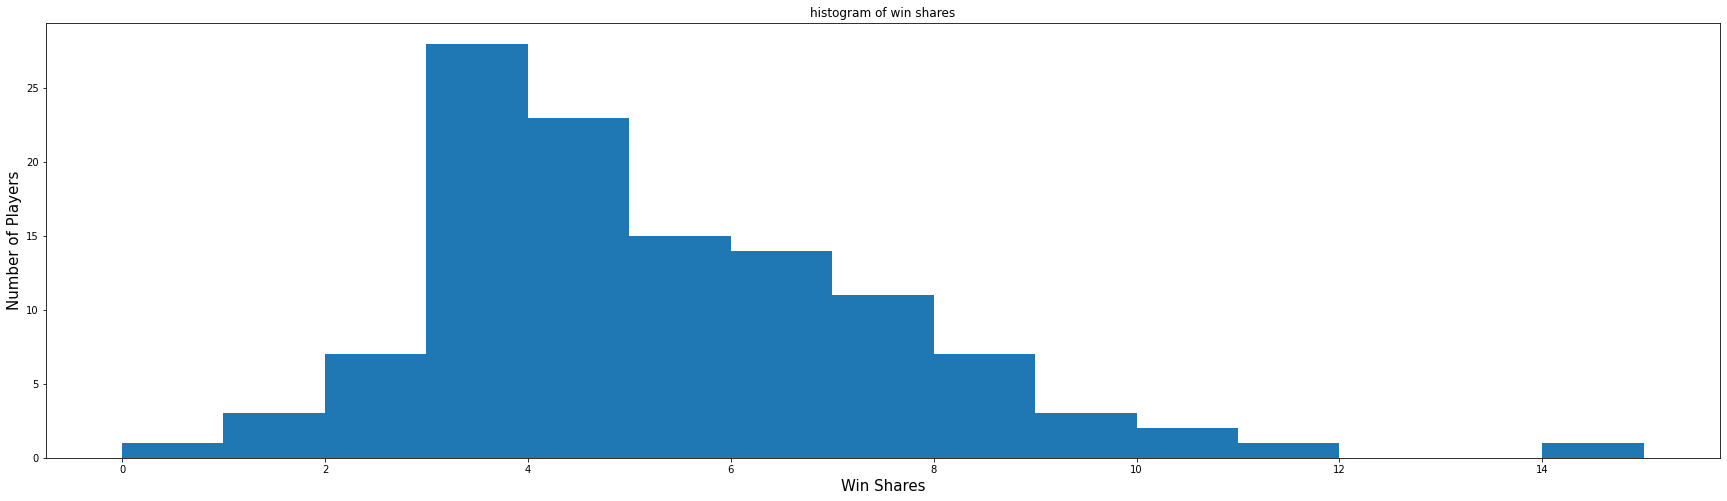

In [ ]:
plt.figure(figsize = (30,8))
plt.hist(player_stats['WS'], bins = 15)
plt.xlabel('Win Shares', size = 15)
plt.ylabel('Number of Players', size = 15)
plt.title('Win Shares Distribution', size = 20);
plt.title("histogram of win shares")

The distribution is right skewed. The majority of players in the NBA do not havea win share above 5. Those with 6 plus win shares are elite players like all star caliber players. This graph also has an outlier for a player(s) that adds a lot of win shares to their team. 

Text(0.5, 1.0, 'histogram of player effiency rating')

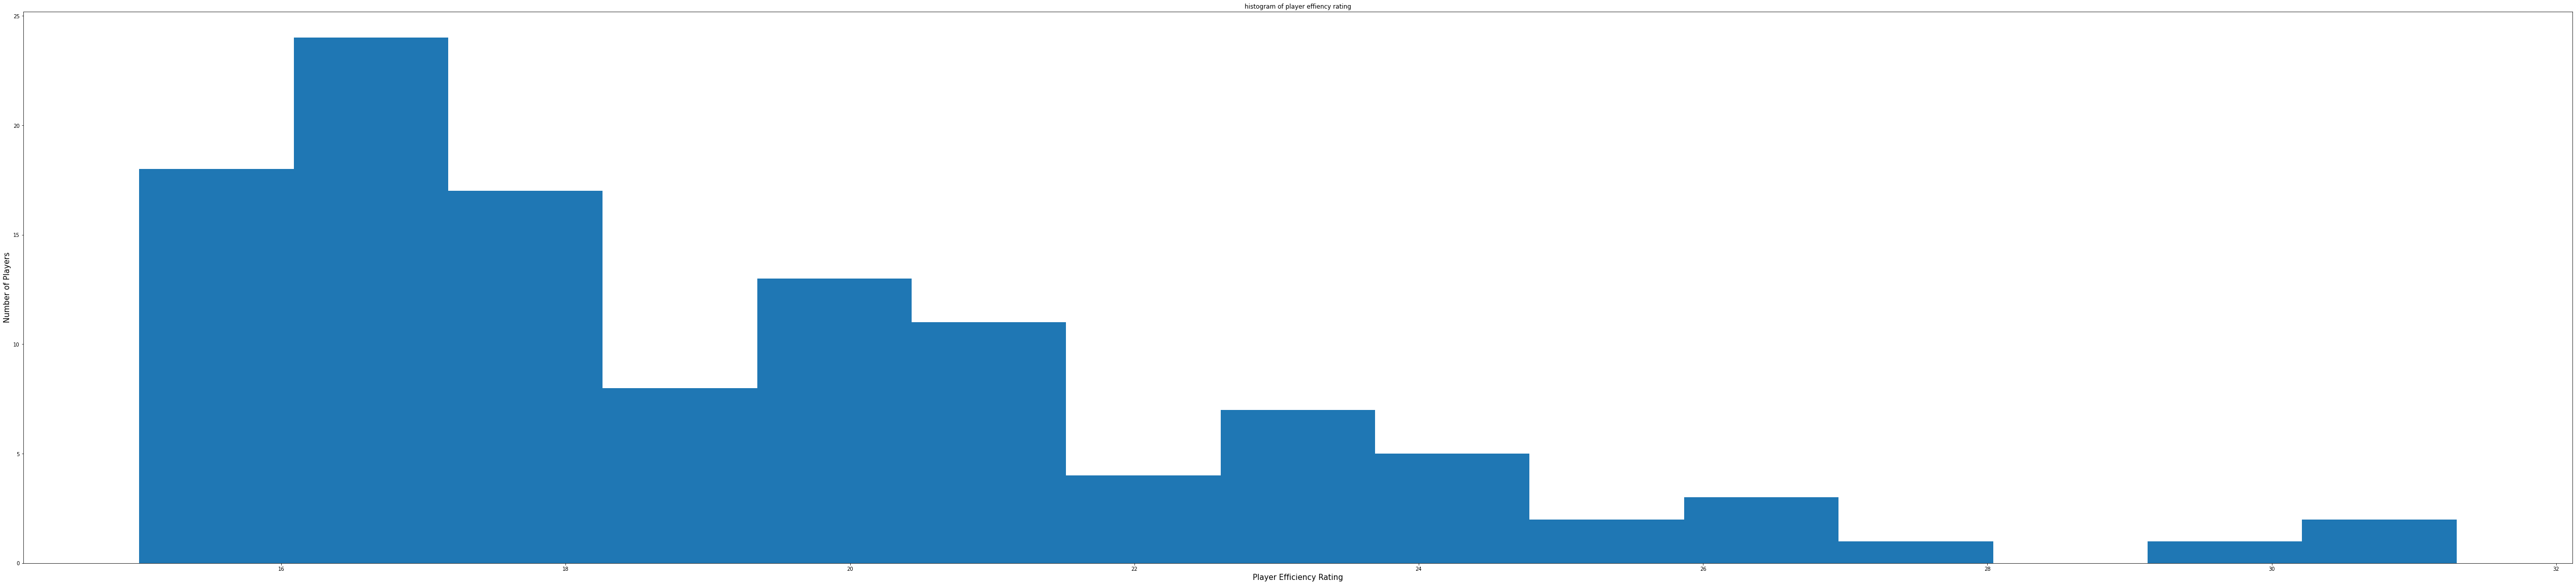

In [ ]:
plt.figure(figsize = (90,20))
plt.hist(player_stats['PER'], bins = 15)
plt.xlabel('Player Efficiency Rating', size = 15)
plt.ylabel('Number of Players', size = 15)
plt.title('Player Efficiency Distribution', size = 20);
plt.title("histogram of player effiency rating")

This graph is also right skewed since the league average PER is 15 most players will be closer to 15 than above it. There are outliers in the graph here as well. 

Text(0.5, 1.0, 'histogram of VORP')

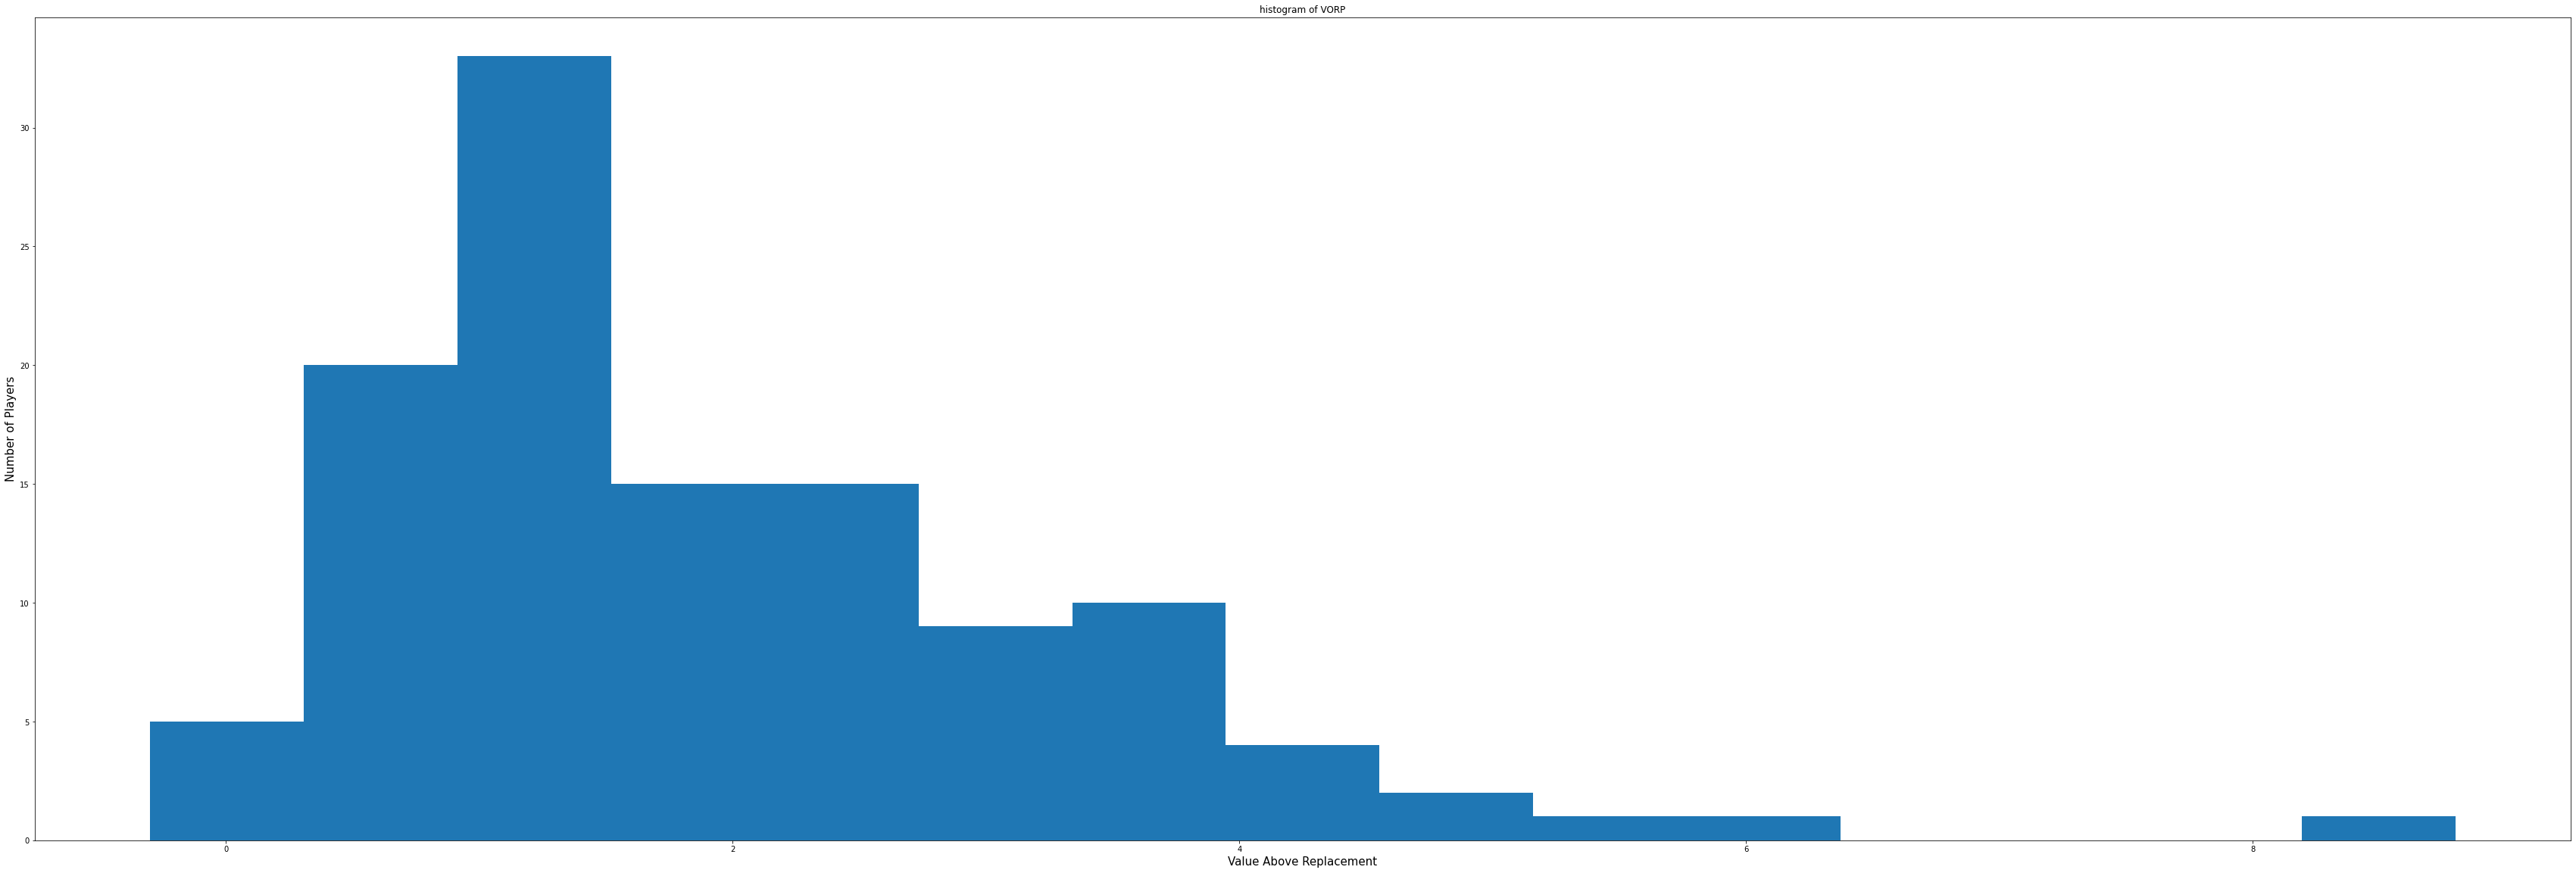

In [ ]:
plt.figure(figsize = (60,20))
plt.hist(player_stats['VORP'], bins = 15)
plt.xlabel('Value Above Replacement', size = 15)
plt.ylabel('Number of Players', size = 15)
plt.title('Value Above Replacement Distribution', size = 20);
plt.title("histogram of VORP")

The distribution is right skewed with most of the numbers around 1-1.5 which makes sense since the average bench player has a VORP of 0. So, since these players have higher PERs and MPs, their VORPs will be higher. It will be intersting to see who has the value above replacement amount greater than 8. Let's see if I can figure it out. 

In [ ]:
player_stats.sort_values(
    by=["VORP", "Player"]
)[["VORP", "Player"]]

,VORP,Player
33,-0.3,Marvin Bagley III
315,0.1,Dwight Howard
120,0.2,Wendell Carter Jr.
184,0.3,Andre Drummond
629,0.3,Isaiah Stewart
...,...,...
410,5.0,Damian Lillard
177,5.1,Luka Dončić
17,5.6,Giannis Antetokounmpo
156,5.8,Stephen Curry


The player with the VORP is Jokic. That's neat. I can alos see the ones with the lowet VORP in the dataset too. I wonder what would happen if I do the same with a few of the other variables such as win share, PER? 

In [ ]:
player_stats.sort_values(
    by=["PER", "Player"]
)[["PER", "Player"]]

,PER,Player
706,15.0,Andrew Wiggins
639,15.0,Daniel Theis
702,15.0,Derrick White
367,15.0,Tyus Jones
57,15.1,Khem Birch
...,...,...
110,26.5,Jimmy Butler
714,27.1,Zion Williamson
17,29.2,Giannis Antetokounmpo
196,30.3,Joel Embiid


The top 5 players in PER during the 2020-2021 season were Jokic, Embiid, Antetokounmpo, Williamson, and Butler. 

In [ ]:
player_stats.sort_values(
    by=["WS", "Player"]
)[["WS", "Player"]]

,WS,Player
690,0,John Wall
598,1,D'Angelo Russell
702,1,Derrick White
33,1,Marvin Bagley III
184,2,Andre Drummond
...,...,...
156,9,Stephen Curry
410,10,Damian Lillard
17,10,Giannis Antetokounmpo
237,11,Rudy Gobert


Based on these statistics, it seems like Jokic has a huge impact on the game as he leads in a lot of these stats. 

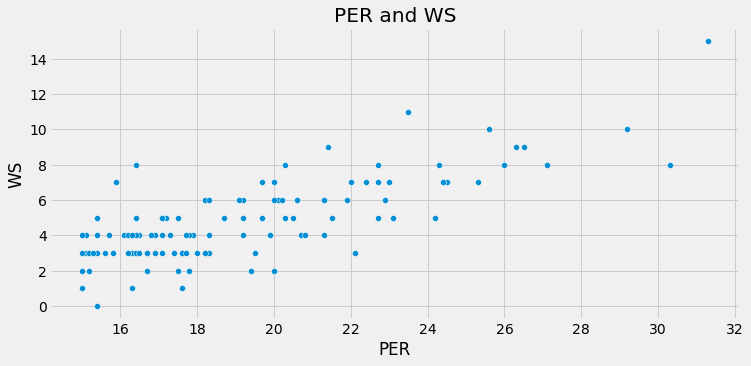

In [ ]:
plt.figure(figsize = (11,5))
sns.scatterplot(x="PER", y="WS", data=player_stats)
plt.xlabel('PER')
plt.ylabel('WS')
plt.title('PER and WS')
plt.show()

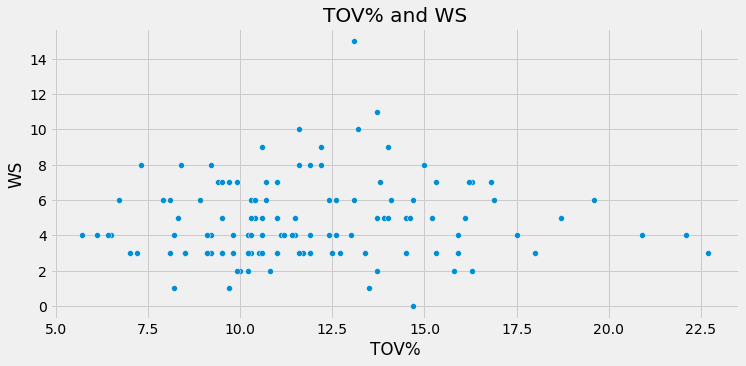

In [ ]:
plt.figure(figsize = (11,5))
sns.scatterplot(x="TOV%", y="WS", data=player_stats)
plt.xlabel('TOV%')
plt.ylabel('WS')
plt.title('TOV% and WS')
plt.show()

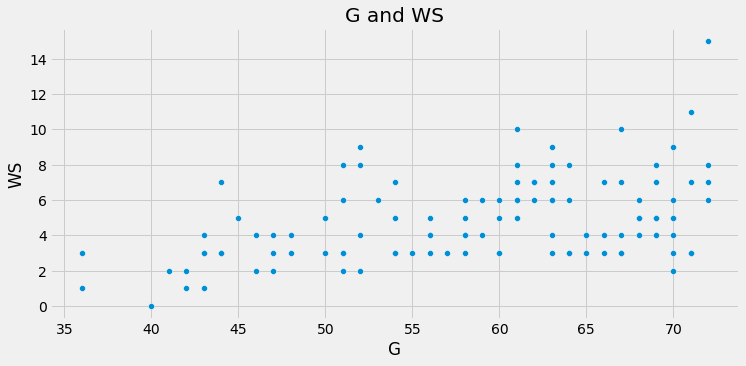

In [ ]:
plt.figure(figsize = (11,5))
sns.scatterplot(x="G", y="WS", data=player_stats)
plt.xlabel('G')
plt.ylabel('WS')
plt.title('G and WS')
plt.show()

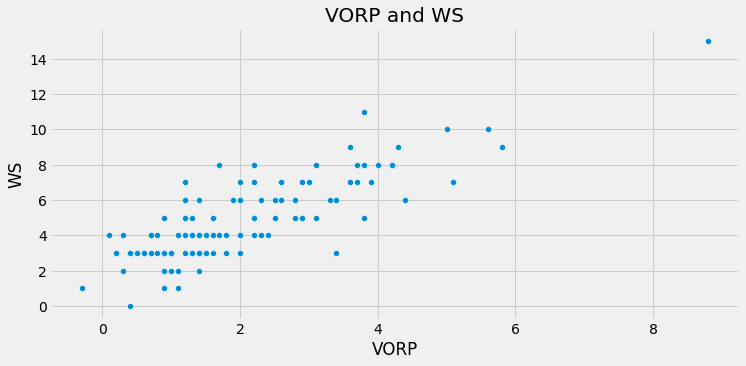

In [ ]:
plt.figure(figsize = (11,5))
sns.scatterplot(x="VORP", y="WS", data=player_stats)
plt.xlabel('VORP')
plt.ylabel('WS')
plt.title('VORP and WS')
plt.show()

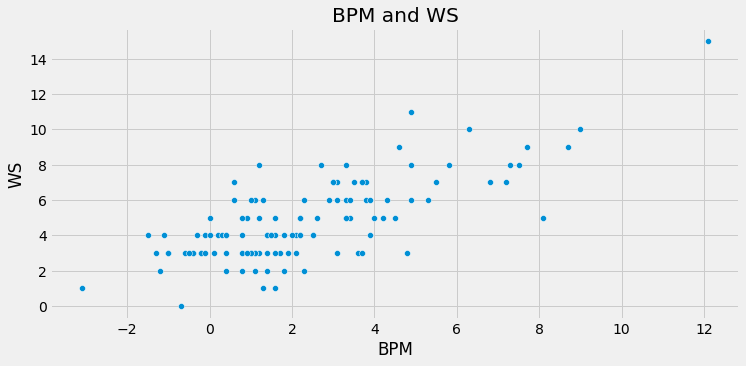

In [ ]:
plt.figure(figsize = (11,5))
sns.scatterplot(x="BPM", y="WS", data=player_stats)
plt.xlabel('BPM')
plt.ylabel('WS')
plt.title('BPM and WS')
plt.show()

In [ ]:
#checking the correlation between the different variables
player_stats.corr()

,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
Age,1.000000,-0.056046,-0.064572,0.077703,0.108613,0.069780,0.014650,-0.035838,0.018265,0.002591,...,0.125370,-0.022635,0.085268,0.081772,0.118214,0.195577,0.127013,0.192014,0.199518,0.130235
G,-0.056046,1.000000,0.537608,0.037048,0.298755,-0.270339,0.027753,0.255756,0.126513,0.193741,...,0.065314,-0.269401,0.357621,0.388373,0.434126,0.266322,-0.086033,0.114849,-0.021685,0.162622
MP,-0.064572,0.537608,1.000000,0.349085,0.086377,0.029647,0.058471,-0.217984,-0.017707,-0.098107,...,0.033578,0.357262,0.544569,0.455479,0.597622,0.170767,0.445763,-0.025946,0.377913,0.604991
PER,0.077703,0.037048,0.349085,1.000000,0.335545,-0.259249,0.418476,0.160399,0.382984,0.324286,...,0.032578,0.567608,0.762797,0.442371,0.774092,0.760274,0.810852,0.267593,0.832449,0.816484
TS%,0.108613,0.298755,0.086377,0.335545,1.000000,-0.234749,0.308686,0.368915,0.277829,0.344431,...,0.118368,-0.310322,0.594149,0.174270,0.544306,0.672349,0.194349,0.183652,0.253606,0.238764
3PAr,0.069780,-0.270339,0.029647,-0.259249,-0.234749,1.000000,-0.539982,-0.772567,-0.550037,-0.681060,...,-0.321189,0.273537,-0.122963,-0.337471,-0.216527,-0.315844,0.255333,-0.280162,0.095805,0.063462
FTr,0.014650,0.027753,0.058471,0.418476,0.308686,-0.539982,1.000000,0.417510,0.431026,0.458570,...,0.368464,0.084844,0.282014,0.289057,0.346442,0.395337,0.085082,0.209000,0.170473,0.176707
ORB%,-0.035838,0.255756,-0.217984,0.160399,0.368915,-0.772567,0.417510,1.000000,0.724636,0.889270,...,0.212849,-0.465664,0.071107,0.301049,0.175378,0.359642,-0.339413,0.221234,-0.195044,-0.180429
DRB%,0.018265,0.126513,-0.017707,0.382984,0.277829,-0.550037,0.431026,0.724636,1.000000,0.959012,...,0.256571,-0.134986,0.121494,0.573674,0.304429,0.397006,-0.063885,0.406475,0.132185,0.148731
TRB%,0.002591,0.193741,-0.098107,0.324286,0.344431,-0.681060,0.458570,0.889270,0.959012,1.000000,...,0.259840,-0.280642,0.117644,0.512312,0.283192,0.421819,-0.176160,0.366785,0.015358,0.031241


In [ ]:
corr= player_stats.corr()['WS'].reset_index()
corr=corr.sort_values([('WS')],ascending=False)
corr

,index,WS
17,WS,1.000000
15,OWS,0.933927
18,WS/48,0.859440
22,VORP,0.823164
3,PER,0.774092
21,BPM,0.743059
19,OBPM,0.641843
16,DWS,0.614116
2,MP,0.597622
4,TS%,0.544306


After seeing which features had higher correlations with the target, Win Shares, I decided to use these features for the models I ran:


VORP- Value above replacement 

PER- Player efficiency rating 

BPM- Box socre plus minus 

MP- minutes played

TS%- True shooting percentage 

GP- Games played 


I selected these features over OWS(Offensive Win Shares), WS/48(Win Shares per 48 minutes), OBPM(Offensive Box score plus minus), and DWS(Defensive Win Shares) because I thought these variables would cause an issue with multicollinearity where because they are so highly correlated with other features that it would potentially cause an issue with overfitting once I ran my models. Therefore, I excluded them. 

**Fitting and Running the Models**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn import neighbors
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from operator import itemgetter

In [ ]:
# `Y` is the target variable (what you are trying to predict)
Y = player_stats['WS']

# `X` is the feature set that I used to predict the WS
X = player_stats[['G','TS%','VORP','PER','MP','BPM']]

In [ ]:
# Create the train test datasets
# Create the train test datasets

train, test = train_test_split(player_stats, test_size=0.25, random_state=99)

x_train = train[['G','TS%','VORP','PER','MP','BPM']]
y_train = train[['WS']]

x_test = test[['G','TS%','VORP','PER','MP','BPM']]
y_test = test[['WS']]

In [ ]:
# Create the Linear Regression model

linReg = linear_model.LinearRegression()
linReg.fit(x_train, y_train)

linReg.predict(x_test)

y_lin_pred = linReg.predict(x_test)

print('Score: %.3f' % linReg.score(x_train, y_train))
print('Mean squared error: %.3f' % mean_squared_error(y_test, y_lin_pred))
print('Mean Absolute error: %.3f' % mean_absolute_error(y_test, y_lin_pred))
print('Variance score: %.3f' % r2_score(y_test, y_lin_pred))

Score: 0.894
Mean squared error: 0.950
Mean Absolute error: 0.767
Variance score: 0.820


In [ ]:
# Create the Support Vector Regression model

svr = SVR(kernel='rbf', gamma=1e-3, C=150, epsilon=0.3)
svr.fit(x_train, y_train.values.ravel())

y_svr_pred = svr.predict(x_test)

print('Score: %.3f' % svr.score(x_train, y_train))
print("Mean squared error: %.3f" % mean_squared_error(y_test, y_svr_pred))
print('Mean Absolute error: %.3f' % mean_absolute_error(y_test, y_svr_pred))
print('Variance score: %.3f' % r2_score(y_test, y_svr_pred))

Score: 0.985
Mean squared error: 2.980
Mean Absolute error: 1.421
Variance score: 0.435


In [ ]:
# Create the k-Nearest Neighbors Regression Model

knn = neighbors.KNeighborsRegressor(n_neighbors = 7, weights = 'uniform')
knn.fit(x_train, y_train)

y_knn = knn.predict(x_test)

print('Score: %.3f' % knn.score(x_train, y_train))
print("Mean Squared Error: %.3f" % mean_squared_error(y_test, y_knn))
print('Mean Absolute error: %.3f' % mean_absolute_error(y_test, y_knn))
print('Variance Score: %.3f' % r2_score(y_test, y_knn))

Score: 0.438
Mean Squared Error: 4.006
Mean Absolute error: 1.537
Variance Score: 0.241


After looking at the metrics for each model the linear regression performed best. It had a score of 86.4% with the lowest mean scored error. 

The Support Vector Machine appears to be overfit and the KNN is underfit. 

Let's take a look at the visualization of the predictions

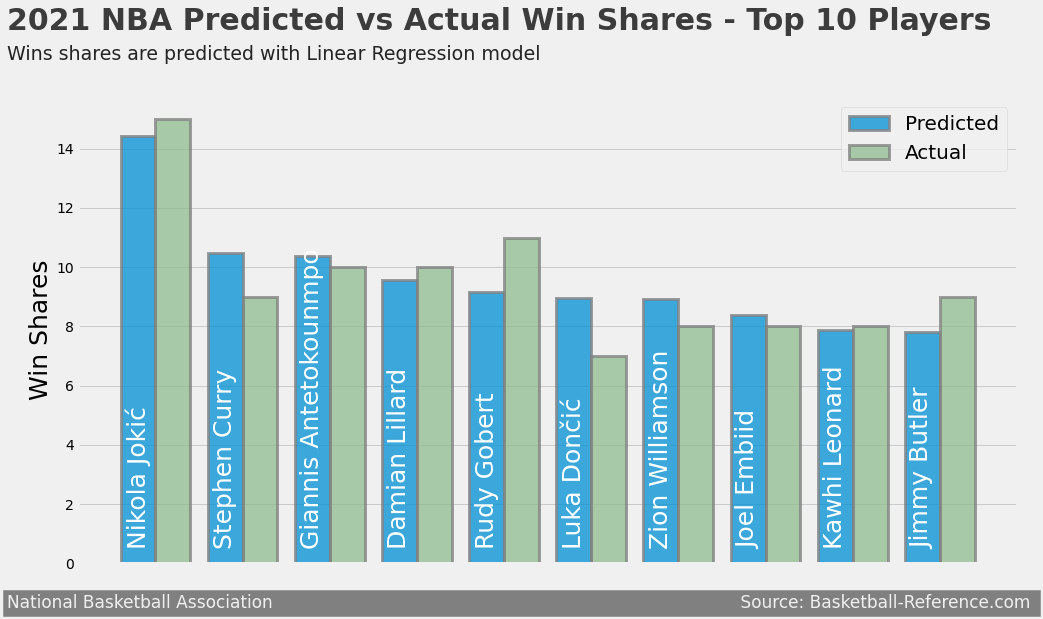

In [ ]:
# Predict Win Shares using Linear Regression Model

lin_new = player_stats[['G','TS%','VORP','PER','MP','BPM']]

lin_pred_2021 = linReg.predict(lin_new)

lin_names = player_stats.iloc[:, 0]
a = []
for i, j in zip(lin_pred_2021, lin_names):
    a.append({'WS_pred':i,'Player':j})

lin_wins = pd.DataFrame(a)
lin_wins['WS_pred'] = round(lin_wins['WS_pred'].astype(float),2)

lin_wins = lin_wins.sort_values([('WS_pred')], ascending = False).reset_index(drop=True).head(10)
lin_wins = lin_wins.merge(player_stats, on = 'Player', how = 'inner')


pos = np.arange(len(lin_wins['WS_pred']))

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize = (15,8))
plt.bar(pos, lin_wins['WS_pred'], width = 0.4, alpha = 0.75, edgecolor = 'gray', linewidth = 3, label = 'Predicted')
plt.bar(pos + .4, lin_wins['WS'], width = 0.4, alpha = 0.75, edgecolor = 'gray', linewidth = 3, label = 'Actual',color = 'darkseagreen')
for i in pos:
    plt.text(pos[i], 0.5, s = lin_wins['Player'][i],ha='center', va='bottom', rotation = 'vertical',color = 'white', size = 25)
plt.text(x = -1.5, y = 18, s = '2021 NBA Predicted vs Actual Win Shares - Top 10 Players',fontsize = 30, weight = 'bold', alpha = .75)
plt.text(x = -1.5, y = 17, s = 'Wins shares are predicted with Linear Regression model',fontsize = 19, alpha = .85)
plt.text(x = -1.5, y = -1.5, s = 'National Basketball Association                                                                                       Source: Basketball-Reference.com ', fontsize = 17,color = '#f0f0f0', backgroundcolor = 'grey')
plt.xticks([],[])
plt.legend(prop={'size': 20})
ax.set_ylabel('Win Shares', size = 25);

According to the linear regression model, these are the players that have the most impact on their teams in terms of wins. It is interesting that Kevin Durant is not on the list but he only played 35 games that year due to returning from an achilles injury and did not qualify according to the amount of games played. It is also interesting that LeBron is not included. Could this mean a possibly decline? 

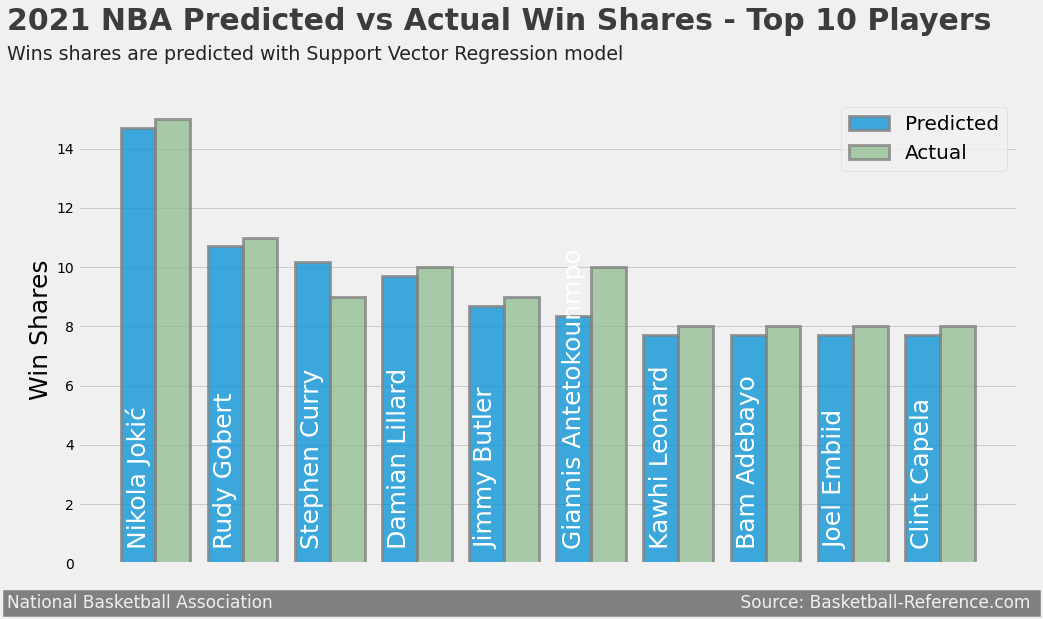

In [ ]:
# Predict Win Shares using Support Vector Regression Model

svr_new = player_stats[['G','TS%','VORP','PER','MP','BPM']]

svr_pred_2021 = svr.predict(svr_new)

svr_names = player_stats.iloc[:, 0]

b = []
for i, j in zip(svr_pred_2021, svr_names):
    b.append({'WS_pred':i,'Player':j})


svr_wins = pd.DataFrame(b)
svr_wins['WS_pred'] = round(svr_wins['WS_pred'].astype(float),2)

svr_wins = svr_wins.sort_values([('WS_pred')], ascending = False).reset_index(drop=True).head(10)
svr_wins = svr_wins.merge(player_stats, on = 'Player', how = 'inner')

pos = np.arange(len(svr_wins['WS_pred']))

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize = (15,8))
plt.bar(pos, svr_wins['WS_pred'], width = 0.4, alpha = 0.75, edgecolor = 'gray', linewidth = 3, label = 'Predicted')
plt.bar(pos + 0.4, svr_wins['WS'], width = 0.4, alpha = 0.75, edgecolor = 'gray', linewidth = 3,label = 'Actual',color = 'darkseagreen')
for i in pos:
    plt.text(pos[i], 0.5, s = svr_wins['Player'][i],ha='center', va='bottom', rotation = 'vertical',color = 'white', size = 25)
plt.text(x = -1.5, y = 18, s = '2021 NBA Predicted vs Actual Win Shares - Top 10 Players',fontsize = 30, weight = 'bold', alpha = .75)
plt.text(x = -1.5, y = 17, s = 'Wins shares are predicted with Support Vector Regression model',fontsize = 19, alpha = .85)
plt.text(x = -1.5, y = -1.5, s = 'National Basketball Association                                                                                       Source: Basketball-Reference.com ', fontsize = 17,color = '#f0f0f0', backgroundcolor = 'grey')
plt.xticks([],[])
plt.legend(prop={'size': 20})
ax.set_ylabel('Win Shares', size = 25);

According to the Support Vector Model, these are the players that impact their team most based on win shares. It is interesting that Mikal Bridges is included here given that he is not an all star player and only averages about 13 ppg. Maybe his defense is an explanation for this. 




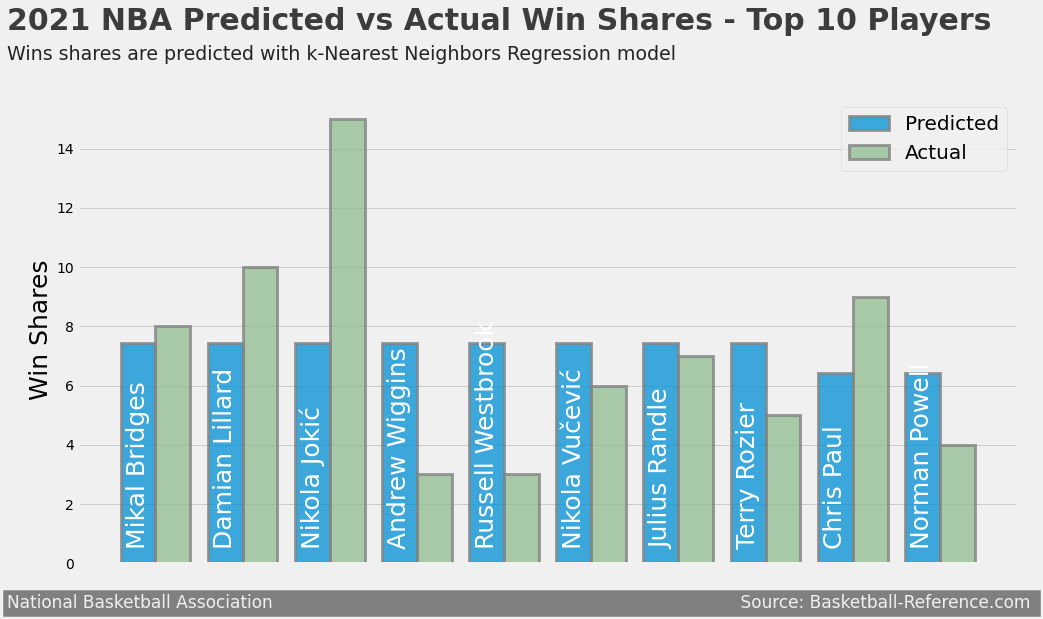

In [ ]:
# Predict Win Shares using k-Nearest Neighbors Regression Model

knn_new = player_stats[['G','TS%','VORP','PER','MP','BPM']]

knn_pred_2021 = knn.predict(svr_new)

knn_names = player_stats.iloc[:, 0]

c = []
for i, j in zip(knn_pred_2021, knn_names):
    c.append({'WS_pred':i,'Player':j})


knn_wins = pd.DataFrame(c)
knn_wins['WS_pred'] = round(knn_wins['WS_pred'].astype(float),2)

knn_wins = knn_wins.sort_values([('WS_pred')], ascending = False).reset_index(drop=True).head(10)
knn_wins = knn_wins.merge(player_stats, on = 'Player', how = 'inner')


pos = np.arange(len(knn_wins['WS_pred']))

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize = (15,8))
plt.bar(pos, knn_wins['WS_pred'], width = 0.4, alpha = 0.75, edgecolor = 'gray', linewidth = 3, label = 'Predicted')
plt.bar(pos + 0.4, knn_wins['WS'], width = 0.4, alpha = 0.75, edgecolor = 'gray', linewidth = 3,label = 'Actual',color = 'darkseagreen')
for i in pos:
    plt.text(pos[i], 0.5, s = knn_wins['Player'][i],ha='center', va='bottom', rotation = 'vertical',color = 'white', size = 25)
plt.text(x = -1.5, y = 18, s = '2021 NBA Predicted vs Actual Win Shares - Top 10 Players',fontsize = 30, weight = 'bold', alpha = .75)
plt.text(x = -1.5, y = 17, s = 'Wins shares are predicted with k-Nearest Neighbors Regression model',fontsize = 19, alpha = .85)
plt.text(x = -1.5, y = -1.5, s = 'National Basketball Association                                                                                       Source: Basketball-Reference.com ', fontsize = 17,color = '#f0f0f0', backgroundcolor = 'grey')
plt.xticks([],[])
plt.legend(prop={'size': 20})
ax.set_ylabel('Win Shares', size = 25);

Accoridng to KNN, these are the players that have the most impact on their teams based on win shares. It is intersting the Jokic's predicted score is well below his actual, especially since he was mvp. 

**Conclusion**

Based on the results, the linear regression model performed best and should be the model used out of the three ran in this project. 

Some of the things that I would add to this project that I believe could make it better would be the basic stats as well as potentially using multiple seasons of data rather than just one season which could give more insights over a larger span of time as to who makes the most impact in this current day of basketball. Also, running a different model to see what it predicts based on the features that I train it with. 